## Group Project Proposal

## Heart Disease

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*




**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
- Heart disease is a variety of conditions that effect the heart, while angina specifically is a type of discomfort or chest pain that results when one’s heart muscles don’t get enough oxygen from their blood. 

**Clearly state the question you will try to answer with your project**
- Is there a target audience for each chest pain type? 

**Identify and describe the dataset that will be used to answer the question**
- The dataset contains patient chart data provided by physicians from 4 different cardiovascular clinics in Hungary, Switzerland and the United States. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. 

In [ ]:
test jade

## Preliminary exploratory data analysis

**Loading R libraries**

In [20]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

**Reading the data into R**

In [21]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")
cleveland_data <- cleveland_data |>
mutate(cp = as_factor(cp))

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the na and all the missing values** 

In this dataset, we can see that only ca and thal columns has the header of chr and every other columns has dbl. It tells us that only ca and thal has the missing value which is represent by '?' in this dataset because '?' is a string. We can then filter the '?' out of these two columns, and use the drop_na() to make sure we drop all the na values.

In [22]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Then we can split the data into training and testing data

In [23]:
chest_pain_split <- initial_split(filtered_data, prop = 0.75, strata = cp)  
chest_pain_train <- training(chest_pain_split)   
chest_pain_test <- testing(chest_pain_split)

chest_pain_train
chest_pain_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
40,1,1,140,199,0,0,178,1,1.4,1,0.0,7.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


**Change the column type**

Once we clear the missing values we can make the ca and thal columns back to numeric.

In [24]:
type_train_data <- chest_pain_train |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

type_test_data <- chest_pain_test |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))
type_train_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0,4,124,197,0,0,136,1,0.0,2,0,3,1
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2


**Summarize data**

**Discover the distribution of chest pain type**

In [25]:
counting_types <- type_train_data |>
group_by(cp)|>
summarize(types_count = n()) 

counting_types

cp,types_count
<fct>,<int>
1,19
2,35
3,63
4,104


**Visualizing data**

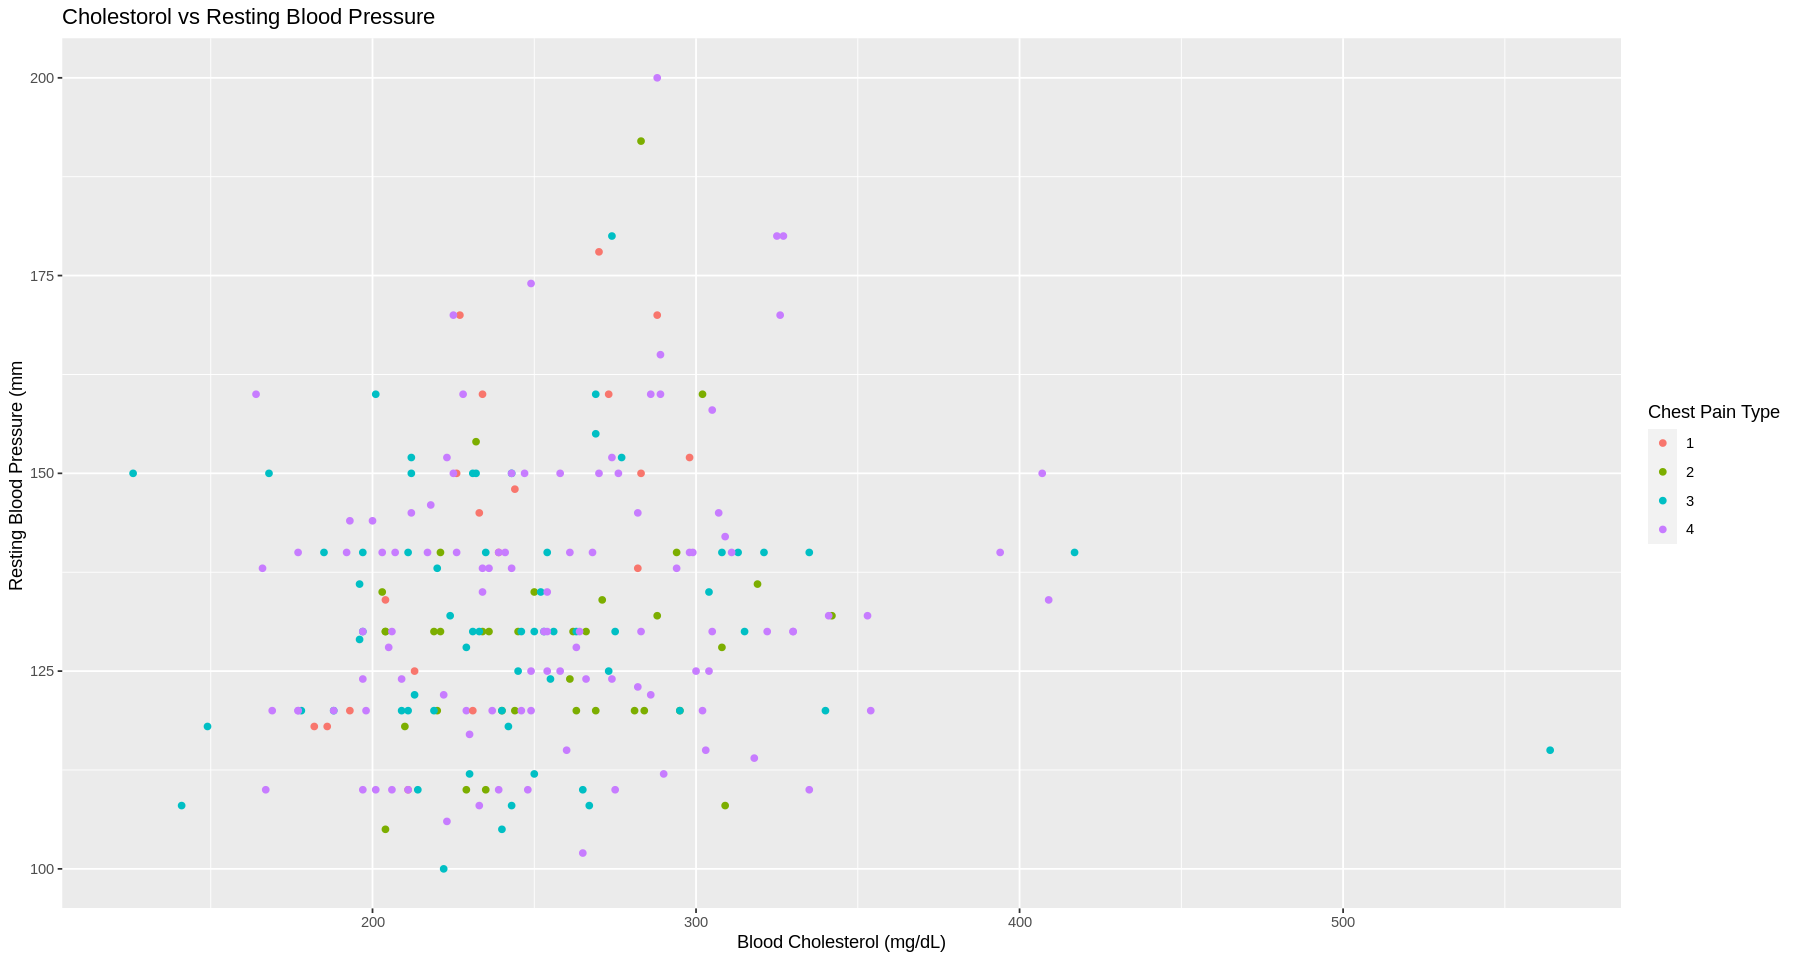

In [26]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- type_train_data |>
ggplot(aes(x = chol , y = trestbps, color = cp))+
geom_point()+
labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm ", color = "Chest Pain Type") +
ggtitle("Cholestorol vs Resting Blood Pressure")
trestbps_vs_chol

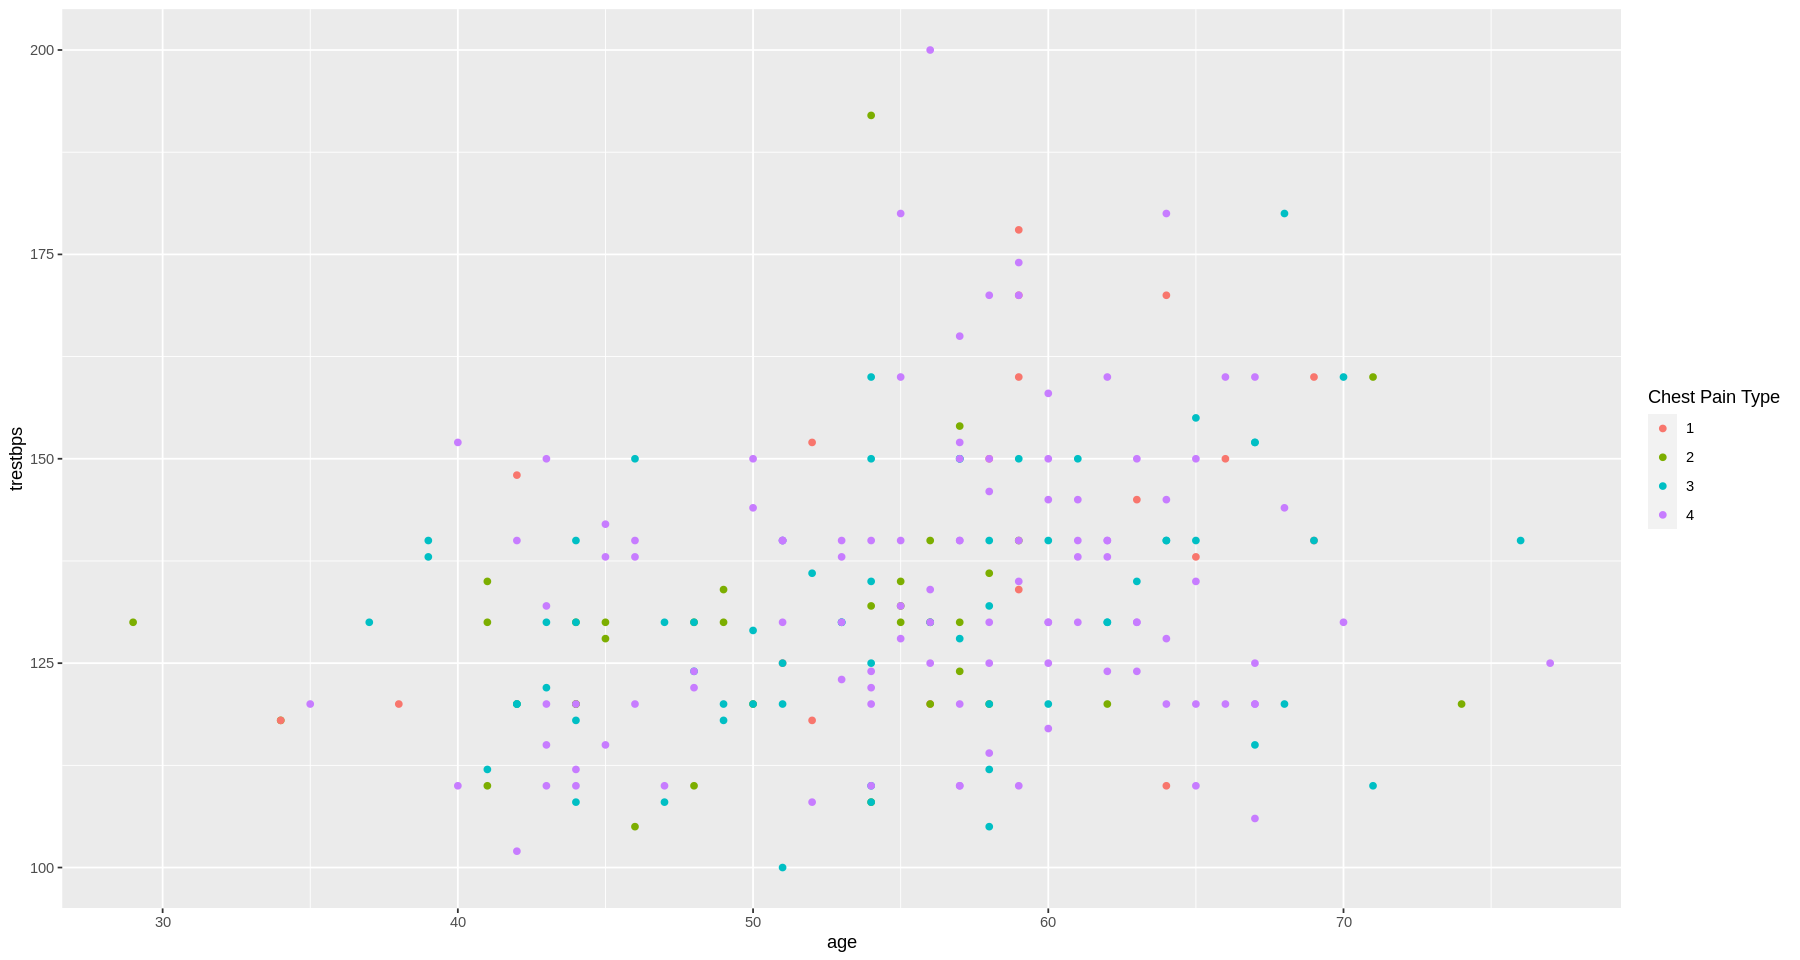

In [27]:
trestbps_vs_age <- type_train_data |>
ggplot(aes(x = age , y = trestbps, color = cp))+
geom_point()+
labs(x = "age", y = "trestbps", color = "Chest Pain Type")
trestbps_vs_age

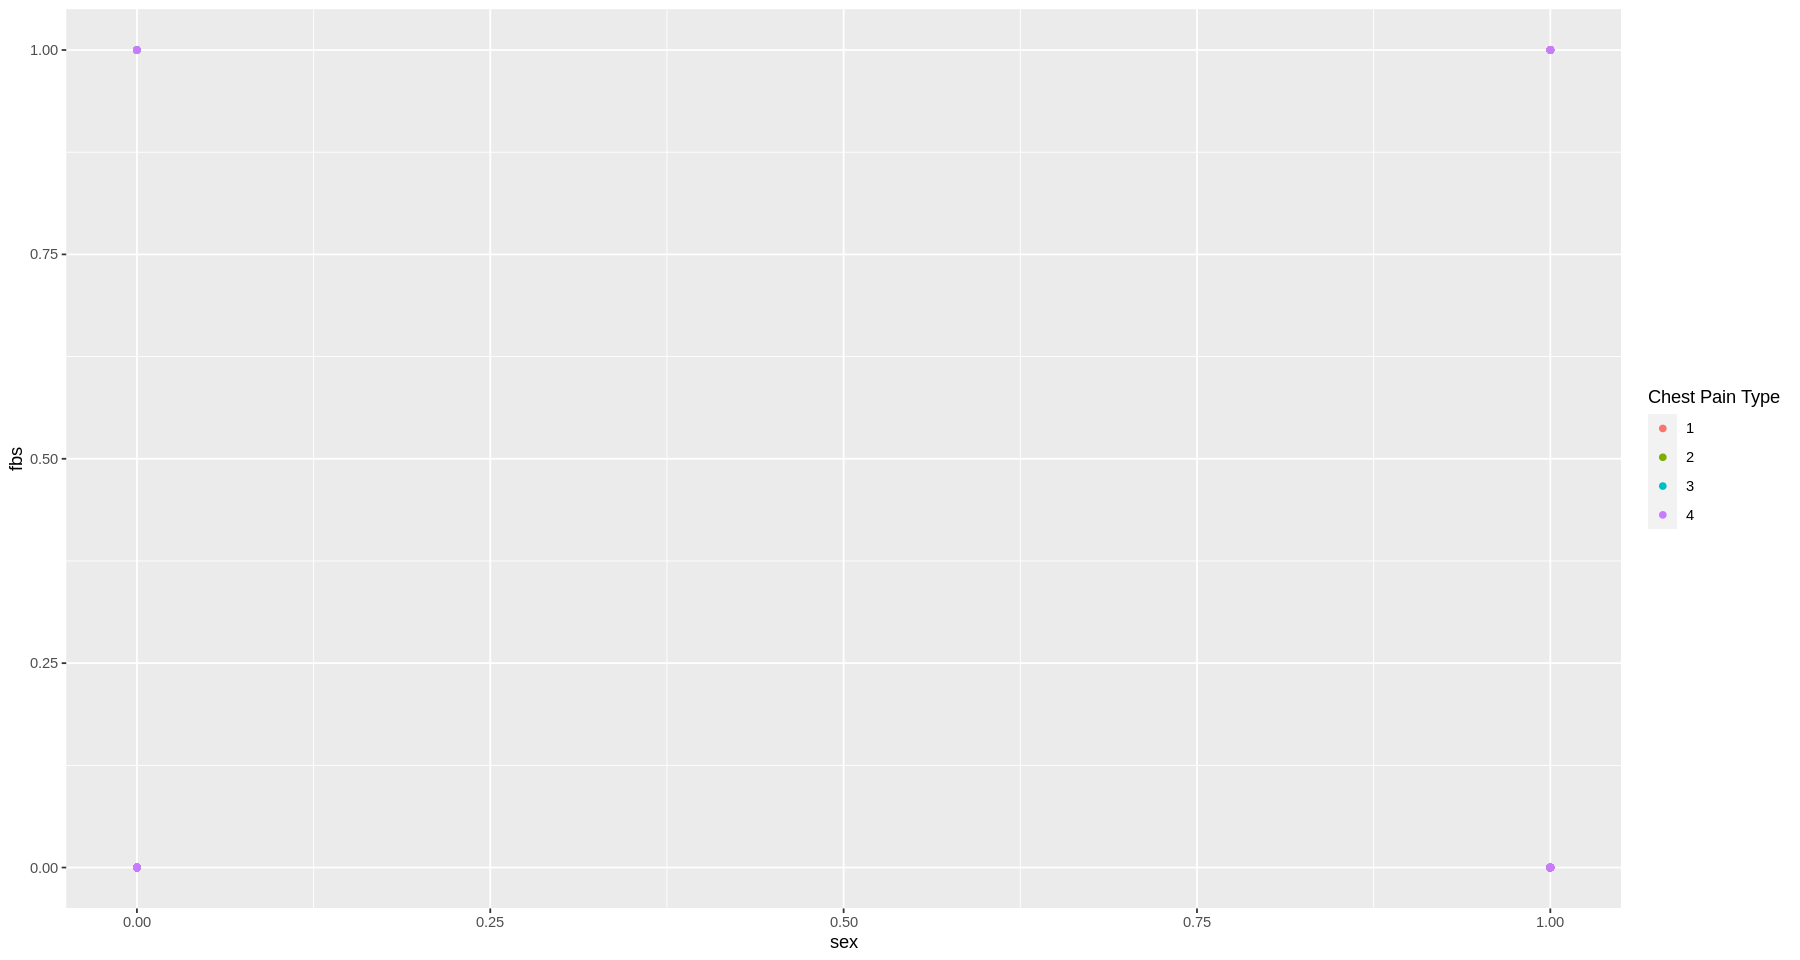

In [28]:
age_vs_fbs <- type_train_data |>
ggplot(aes(x = sex , y = fbs, color = cp))+
geom_point()+
labs(x = "sex", y = "fbs", color = "Chest Pain Type")
age_vs_fbs

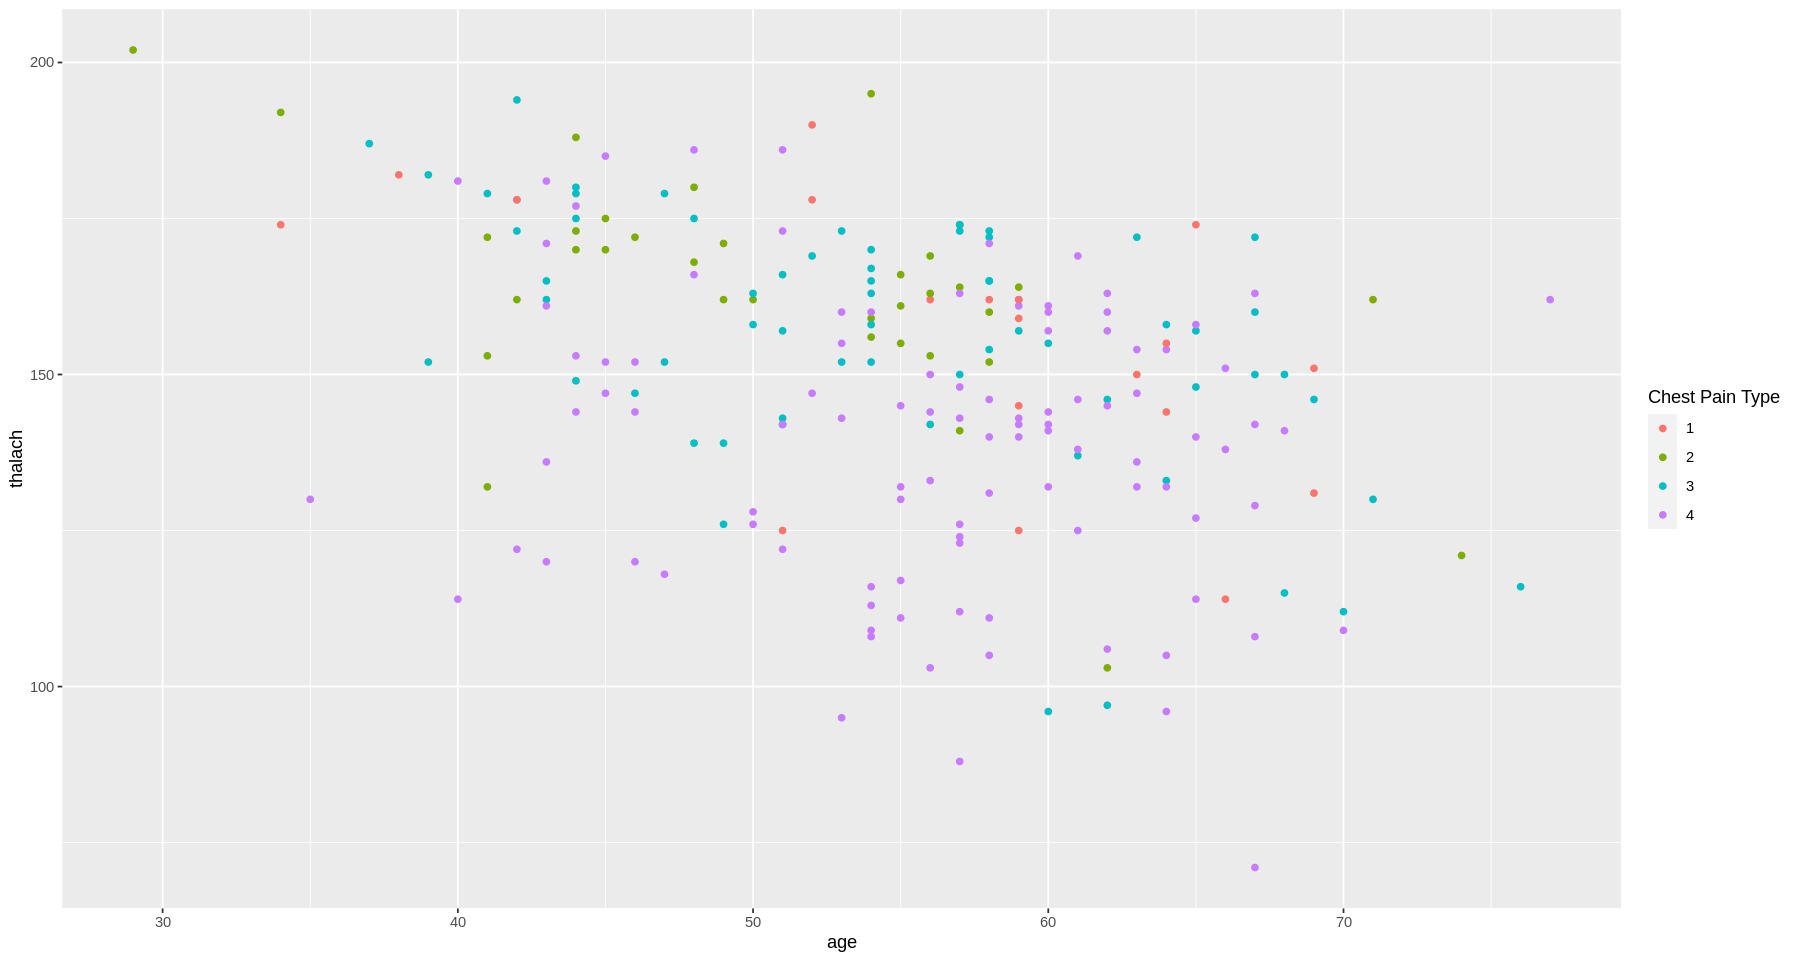

In [29]:
age_vs_thalach <- type_train_data |>
ggplot(aes(x = age , y = thalach, color = cp))+
geom_point()+
labs(x = "age", y = "thalach", color = "Chest Pain Type")
age_vs_thalach

## Methods

## Expected outcomes and significance